<a href="https://colab.research.google.com/github/raisaksh1/Machine-Learning/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df = df.iloc[:, 2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
27,47,30000,1
346,53,72000,1
152,31,76000,0
313,49,141000,1
370,60,46000,1


Train test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape

((280, 2), (120, 2))

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [8]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [10]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [11]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [9]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [12]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


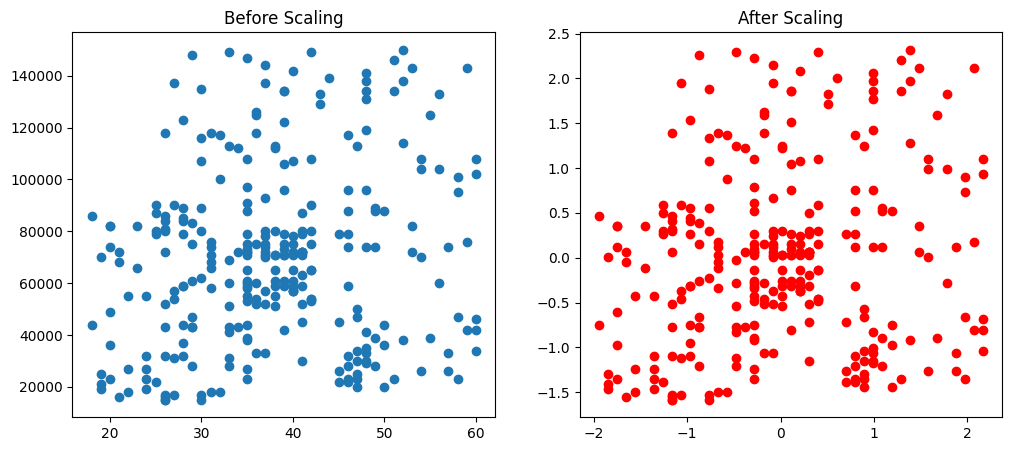

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title("After Scaling")
plt.show()

here we are having the probability density function of the two graph. PDF(age) is thinner as age is very small and the salary is very high so they are scattered in all respects.


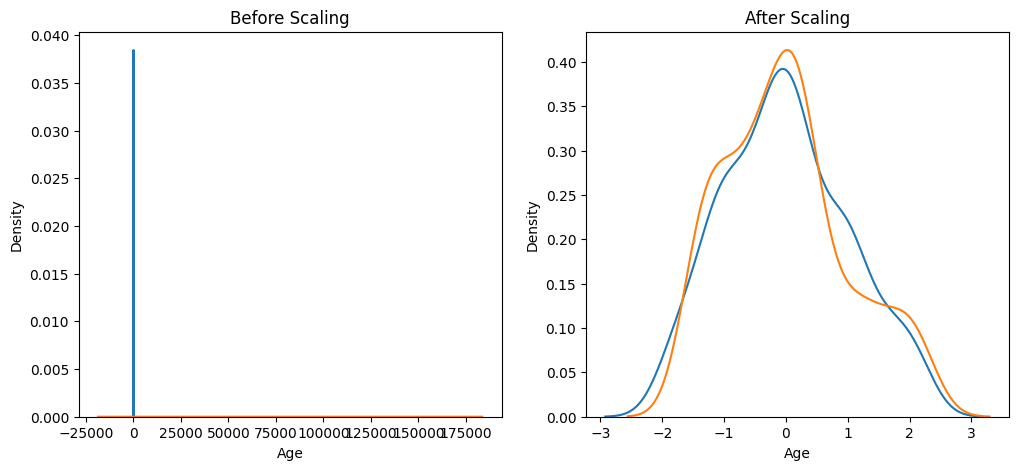

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

#after Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

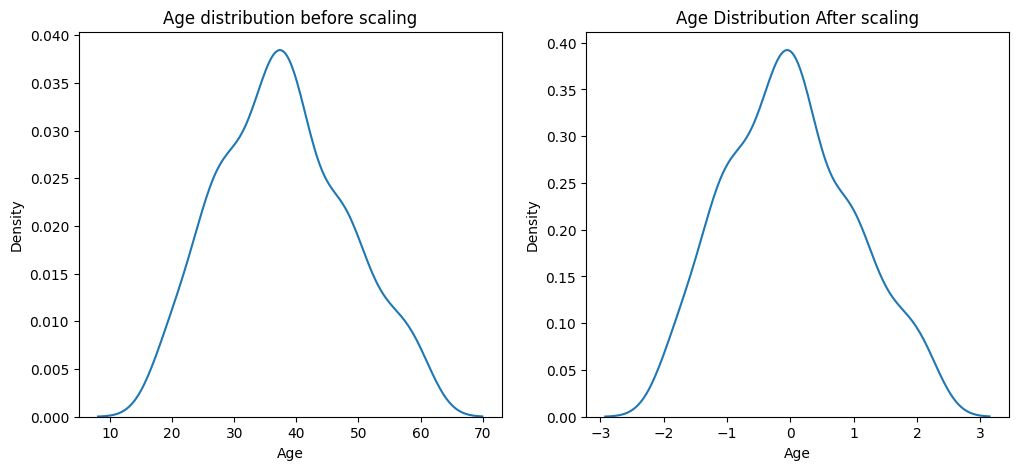

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

#before scaling
ax1.set_title('Age distribution before scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

#after scaling
ax2.set_title('Age Distribution After scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

Example of scaling that can be seen in the above datasets

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score


In [25]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [26]:
from sklearn.tree import DecisionTreeClassifier


In [27]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [28]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [30]:
print("Actual", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred))

Actual 0.875
Scaled 0.875


In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [35]:
df = pd.concat([df, pd.DataFrame({'Age':[5,90,95], 'EstimatedSalary':[1000, 250000, 350000], 'Purchased':[0,1,1]})], ignore_index = True)

In [36]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


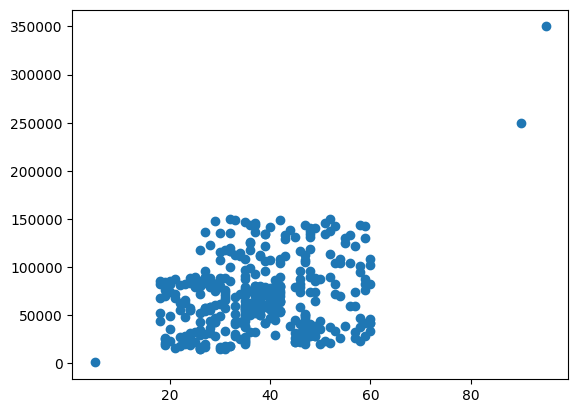

In [37]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [ ]:
from sklearn.model_selection import train_test_split
